<a href="https://colab.research.google.com/github/sovunia-hub/mathematical-modeling-of-applied-problems/blob/main/6_two-dimensional_integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [ ]:
def findGradU(N, eps=1e-8):
  A, f = findAF(N)
  u = np.zeros(N)
  f_norm = np.linalg.norm(f)
  kol = 0
  while True:
    kol += 3
    r = A @ u - f
    Ar = A.conj().T @ r
    u_prev = u
    u = u_prev - (np.linalg.norm(Ar)**2 / np.linalg.norm(A @ Ar)**2) * Ar
    if np.linalg.norm(u - u_prev) / f_norm < eps:
      return u, kol

In [ ]:
def findDoubleGradU(N, eps=1e-8):
  A, f = findAF(N)
  u = np.zeros(N)
  r = A @ u - f
  u_prev = u
  Ar = A.conj().T @ r
  u = u_prev - (np.linalg.norm(Ar)**2 / np.linalg.norm(A @ Ar)**2) * Ar
  f_norm = np.linalg.norm(f)
  kol = 3
  while True:
    kol += 3
    r_prev = r
    r = A @ u - f
    Ar = A.conj().T @ r
    u_prev_prev = u_prev
    u_prev = u
    Ar_norm_square = np.linalg.norm(Ar) ** 2
    alpha_gamma = np.linalg.solve(np.array([[np.linalg.norm(r - r_prev) ** 2, Ar_norm_square],
                                            [Ar_norm_square, np.linalg.norm(A @ Ar) ** 2]]),
                                  np.array([0, Ar_norm_square]))
    u = u_prev - alpha_gamma.item(0) * (u_prev - u_prev_prev) - alpha_gamma.item(1) * Ar
    if np.linalg.norm(u - u_prev) / f_norm < eps:
      return u, kol

In [ ]:
def findBiconjGradU(N, eps=1e-8):
  A, f = findAF(N)
  u = np.zeros(N)
  f_norm = np.linalg.norm(f)

  r = f - A @ u
  temp_r = r
  ro = alp = om = 1
  v = p = s = np.zeros(N)
  kol = 1

  while True:
    kol += 2

    prev_ro = ro
    ro = sum(np.conj(temp_r) * r)
    bet = ro / prev_ro * (alp / om)
    p = r + bet * (p - om * v)
    v = A @ p
    alp = ro / sum(np.conj(temp_r) * v)
    s = r - alp * v
    t = A @ s
    om = sum(t * s) / sum(t * t)
    u_prev = u
    u = u_prev + om * s + alp * p
    r = s - om * t

    if np.linalg.norm(u - u_prev) / f_norm < eps:
      return u, kol

# Практическая работа №6. Двумерная задача интегрального уравнения Фредгольма 2-го рода с ядром с особенностью.

In [ ]:
'''
xc1, xc2 = 0, 0
H = 10
N_values = [10, 20, 30, 40, 100, 1000]

def findAF(N):
  n = np.sqrt(N).astype(int)
  x = np.linspace(xc1 - H/2, xc1 + H/2, n)
  y = np.linspace(xc2 - H/2, xc2 + H/2, n)
  f = lambda x: np.sin(x[0]) + np.cos(x[1])
  k = lambda x, y: 1 / (4 * np.pi * np.linalg.norm(x - y))
  h = H/N

  A = np.zeros((N, N))
  b = np.zeros(N)
  for i in tqdm(range(n)):
    for j in range(n):
      xi = np.array([x[i], y[j]])
      b[i * n + j] = f(xi)
      for k in range(n):
        for l in range(n):
          xj = np.array([x[k], y[l]])
          if (i, j) != (k, l):
            A[i * n + j, k * n + l] = K(xi, xj) * h**2

  A = np.eye(N) + A
  return A, b

def visualize_solution(U, N):
  """Визуализация решения."""
  plt.figure(figsize=(8, 6))
  plt.imshow(U, extent=(xc1 - H/2, xc1 + H/2, xc2 - H/2, xc2 + H/2), origin='lower', cmap='viridis')
  plt.colorbar(label='U(x, y)')
  plt.title(f'Решение интегрального уравнения Фредгольма\nN = {N}')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

for N in N_values:
  u = findGradU(N**2, 1e-8)
  visualize_solution(u[0].reshape((N, N)), N)
  '''

'\nxc1, xc2 = 0, 0\nH = 10\nN_values = [10, 20, 30, 40, 100, 1000]\n\ndef findAF(N):\n  n = np.sqrt(N).astype(int)\n  x = np.linspace(xc1 - H/2, xc1 + H/2, n)\n  y = np.linspace(xc2 - H/2, xc2 + H/2, n)\n  f = lambda x: np.sin(x[0]) + np.cos(x[1])\n  k = lambda x, y: 1 / (4 * np.pi * np.linalg.norm(x - y))\n  h = H/N\n\n  A = np.zeros((N, N))\n  b = np.zeros(N)\n  for i in tqdm(range(n)):\n    for j in range(n):\n      xi = np.array([x[i], y[j]])\n      b[i * n + j] = f(xi)\n      for k in range(n):\n        for l in range(n):\n          xj = np.array([x[k], y[l]])\n          if (i, j) != (k, l):\n            A[i * n + j, k * n + l] = K(xi, xj) * h**2\n\n  A = np.eye(N) + A\n  return A, b\n\ndef visualize_solution(U, N):\n  """Визуализация решения."""\n  plt.figure(figsize=(8, 6))\n  plt.imshow(U, extent=(xc1 - H/2, xc1 + H/2, xc2 - H/2, xc2 + H/2), origin=\'lower\', cmap=\'viridis\')\n  plt.colorbar(label=\'U(x, y)\')\n  plt.title(f\'Решение интегрального уравнения Фредгольма\nN = {N}

In [ ]:
f = lambda x: np.sin(x[0]) + np.cos(x[1])
k = lambda x, y: np.nan_to_num(1 / (4 * np.pi * np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)), posinf=0, neginf=0)

def findAF(N):
  n = int(np.sqrt(N))
  x = np.linspace(xc1 - H/2, xc1 + H/2, n)
  y = np.linspace(xc2 - H/2, xc2 + H/2, n)
  h = H/N

  X, Y = np.meshgrid(x, y)
  points = np.array([X.flatten(), Y.flatten()])

  b = f(points)
  A = np.zeros([N, N])

  for i, point in enumerate(points.T):
    A[i] = k(point, points) * h**2

  A = np.eye(N) + A
  return A, b

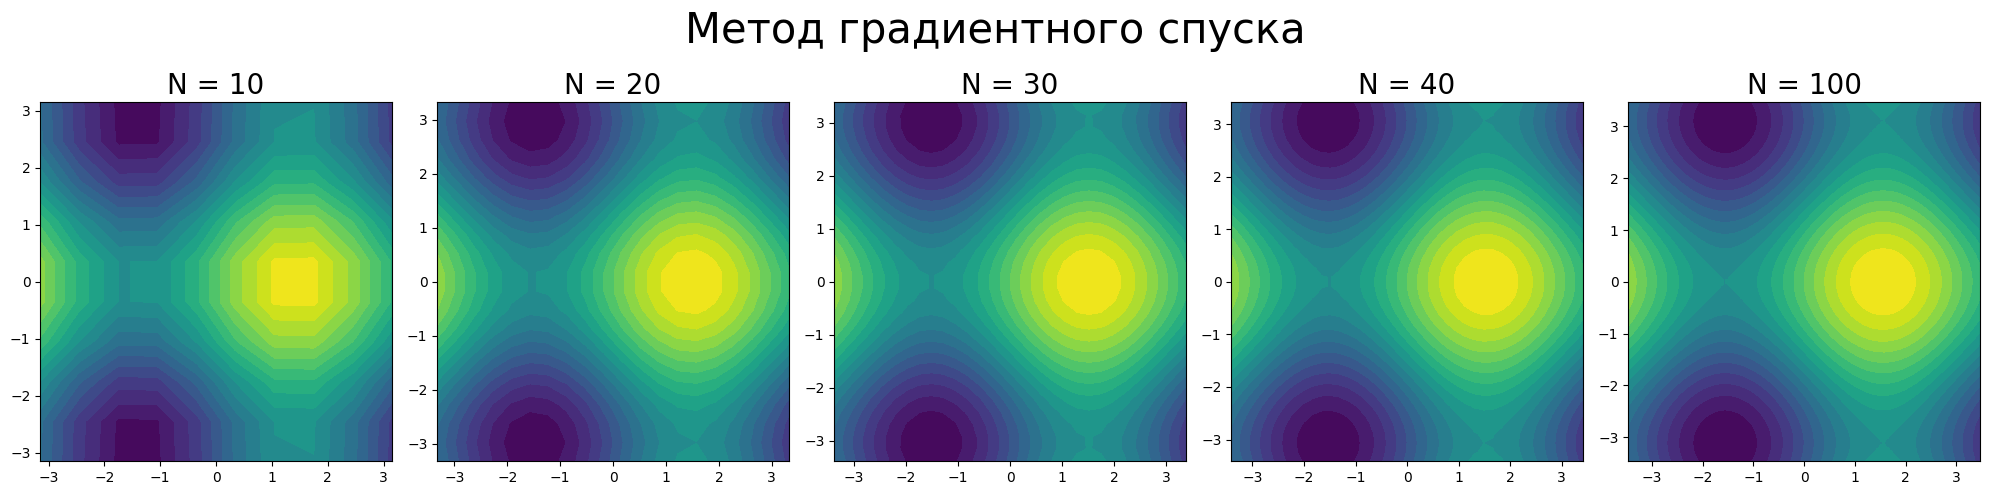

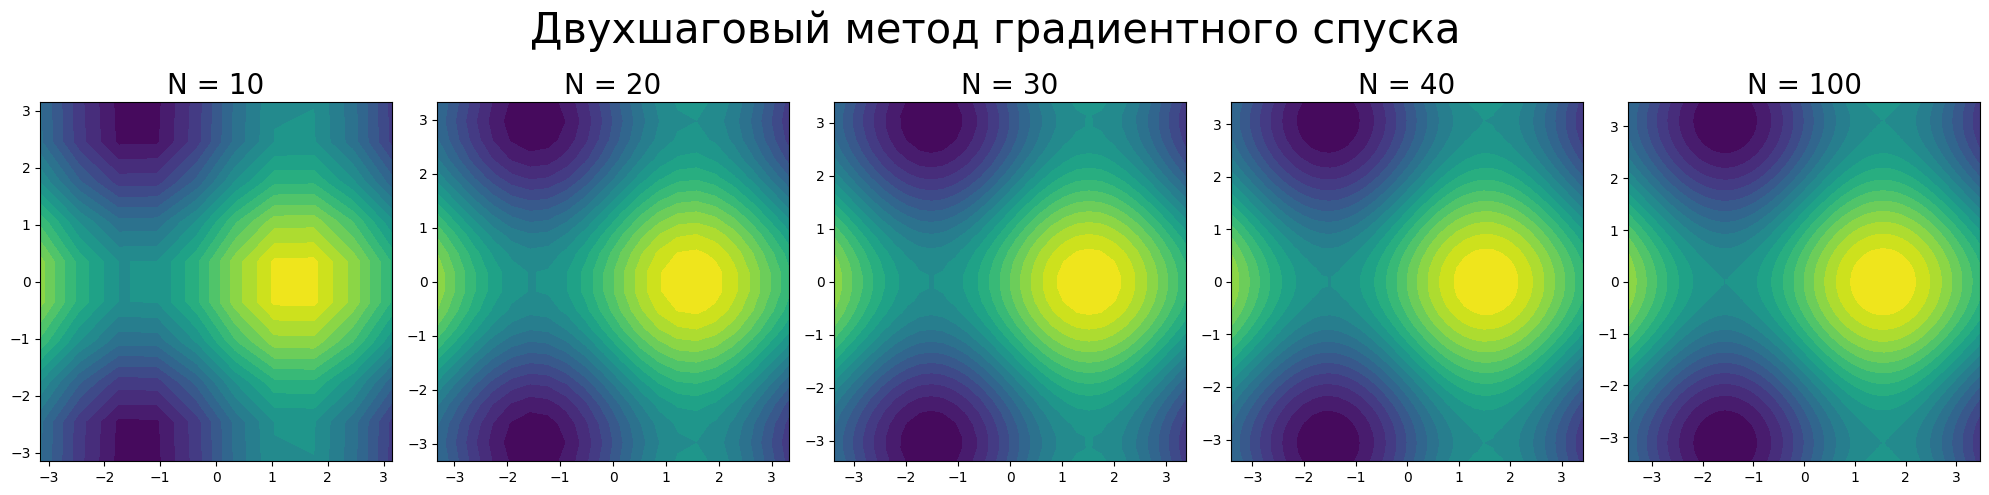

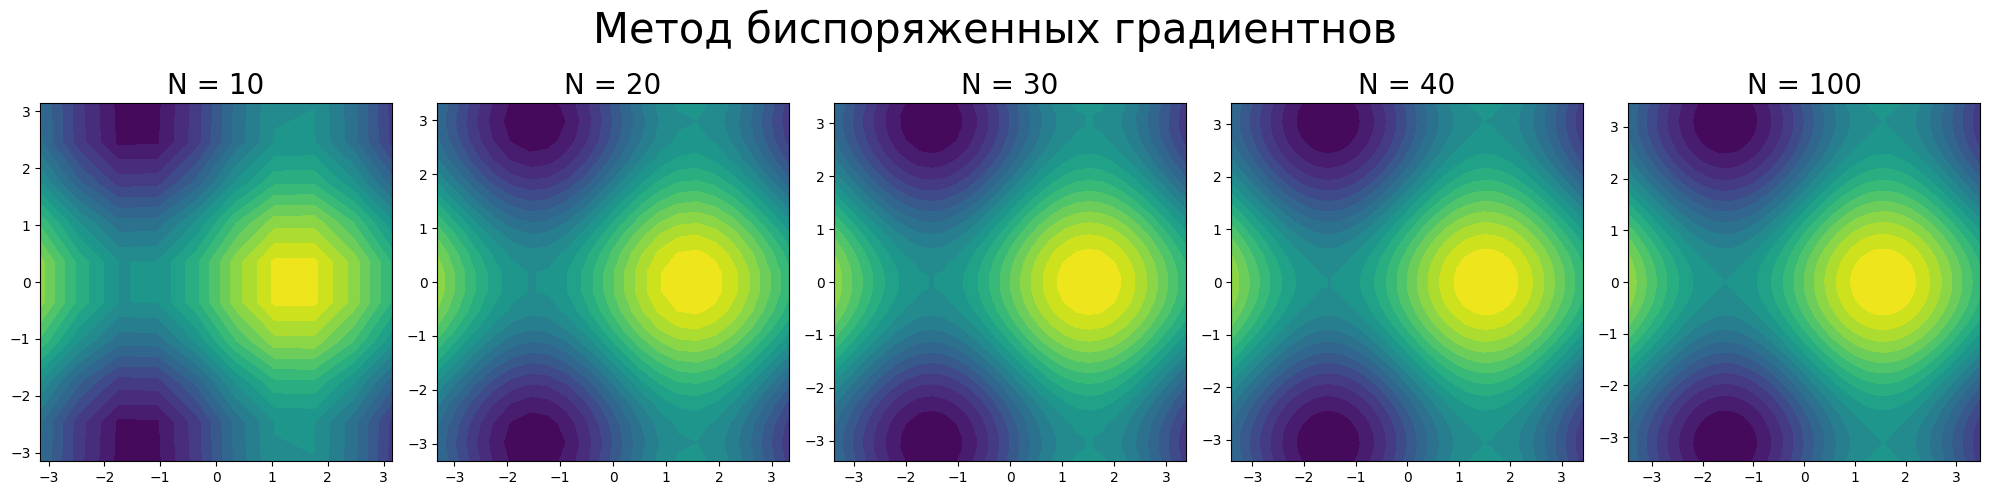

In [ ]:
xc1, xc2 = 0, 0
H = 7
N_values = [10, 20, 30, 40, 100]
solutions = {'Метод градиентного спуска': findGradU,
             'Двухшаговый метод градиентного спуска': findDoubleGradU,
             'Метод биспоряженных градиентнов': findBiconjGradU
             }

results = pd.DataFrame(
    columns = solutions.keys(),
    index = N_values
    )

for method_name, method in solutions.items():
  fig, subarrs = plt.subplots(1, len(N_values), figsize=(20, 5))
  for i, N in enumerate(N_values):
    u, iter = method(N**2, 1e-12)
    results.loc[N, method_name] = iter
    subarrs[i].contourf(u.reshape((N, N)), extent=[xc1 - H/2, xc1 + H/2, xc2 - H/2, xc2 + H/2], origin='image', levels=20)
    subarrs[i].set_title(f'N = {N}', size=20)
  fig.suptitle(method_name, fontsize=30)
  fig.tight_layout()
  plt.show()

In [ ]:
results

,Метод градиентного спуска,Двухшаговый метод градиентного спуска,Метод биспоряженных градиентнов
10,21,18,9
20,18,18,7
30,15,15,7
40,15,15,7
100,12,12,7


100%|██████████| 10/10 [05:30<00:00, 33.04s/it]


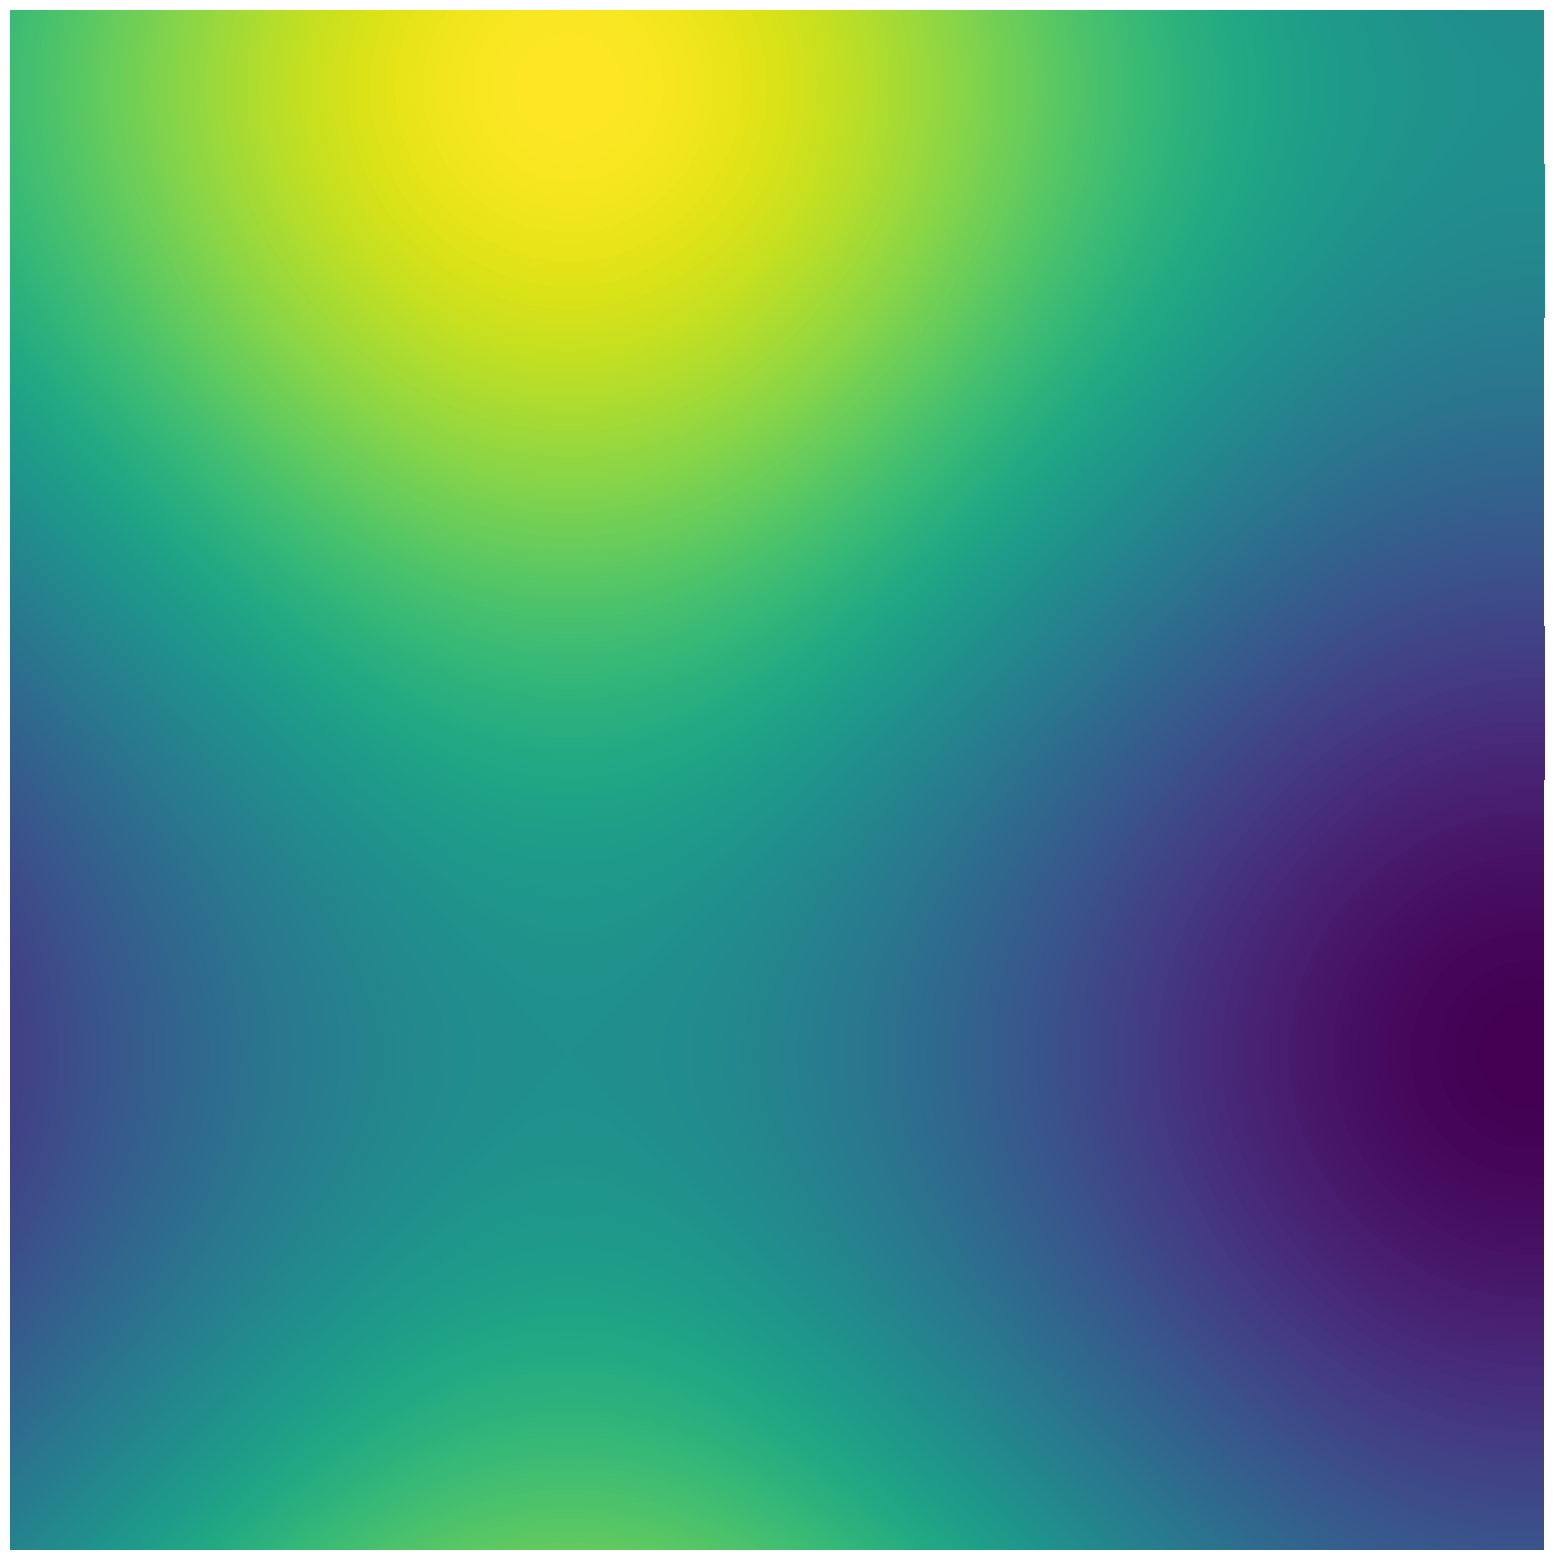

In [ ]:
xc1, xc2 = 0, 0
stxc1, stxc2 = 0, 0
H = 0.5

fig, subarrs = plt.subplots(10, 10, figsize=(20, 20))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = -0.1, hspace = 0)

N = 100
for i in tqdm(range(10)):
  for j in range(10):
    xc1 = stxc1 + i*H
    xc2 = stxc2 + j*H
    u = findBiconjGradU(N**2, 1e-8)
    subarrs[j][i].axis('off')
    subarrs[j][i].imshow(u[0].reshape((N, N)), vmin=-2, vmax=2)
    #subarrs[j][i].contourf(u[0].reshape((N, N)), origin='image', vmin=-2, vmax=2)